In [133]:
# Import modules 
import matplotlib as mpl
import numpy as np 
import pandas as pd 
import datetime
import os

# Make plots in Notebook
%matplotlib inline

# Load marketing_promo.csv
df = pd.read_csv('/Users/mikeallimb/Documents/Data_science/Farfetch/data_science_task/marketing_promo.csv', header=0, 
                 sep=",")

# Simple visualisation of the datasets 
# Day vs visits 
mpl.style.use('ggplot')
df.plot(x='Day', y='visits', kind='scatter')
df.plot(x='Day', y='orders', kind='scatter')
df.plot(x='visits', y='orders', kind='scatter')

(122, 3)

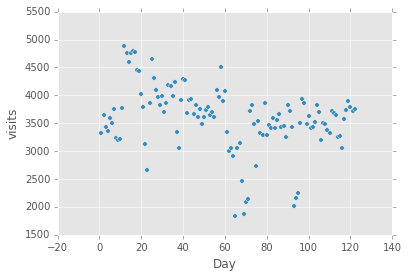

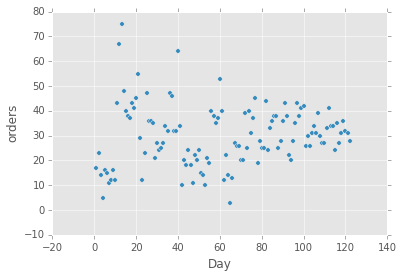

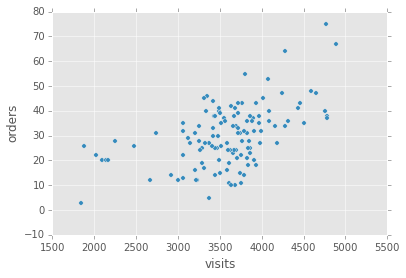

In [134]:
# Simple visualisation of the datasets 
# Day vs visits 
mpl.style.use('ggplot')
df.plot(x='Day', y='visits', kind='scatter')
df.plot(x='Day', y='orders', kind='scatter')
df.plot(x='visits', y='orders', kind='scatter')

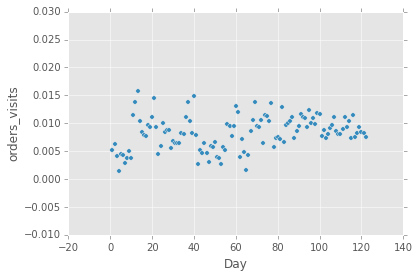

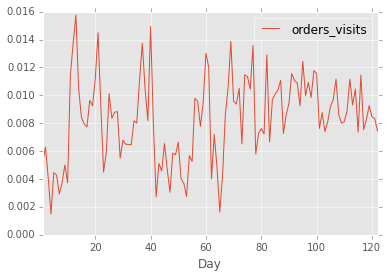

In [135]:
# No correlation between days and visits and orders 
# These two metrics are likely related
# Orders vs visits plot shows that 0-3500 visist doesn't result in more orders normally 
# Hypothesise that orders / visits would be a better metric 
# Make a new column and plot 
df['orders_visits'] = df['orders'] / df['visits']
df.plot(x='Day', y='orders_visits', kind='scatter')
df.plot(x='Day', y='orders_visits', kind='line')

(0, 130)

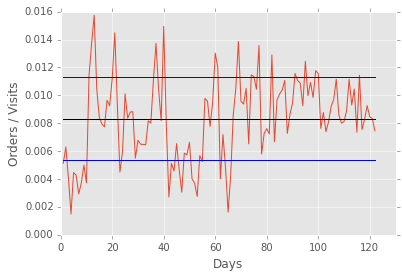

In [151]:
import matplotlib.pyplot as plt
df['mean'] = df['orders_visits'].mean()
df['std'] = df['orders_visits'].std()
df['std_pos'] = mean + std
df['std_neg'] = mean - std
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(df['Day'], df['orders_visits'])
plt.plot(df['Day'], df['mean'], c='black')
plt.plot(df['Day'], df['std_pos'], c='blue')
plt.plot(df['Day'], df['std_neg'], c='blue')
plt.grid(True)
plt.ylabel('Orders / Visits')
plt.xlabel('Days')
plt.xlim([0,130])

In [185]:
df.Day[56:57,]

56    57
Name: Day, dtype: int64

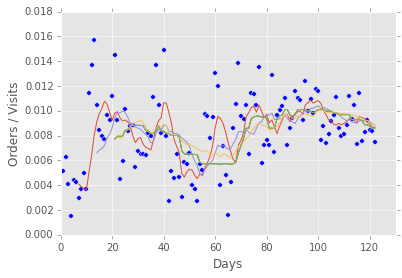

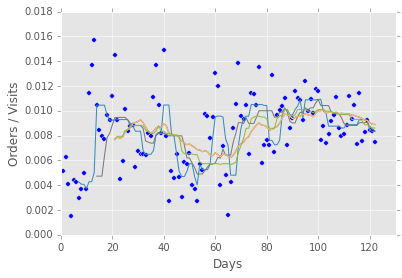

In [161]:
for i in [(7),(14),(21)]:    
    av_y = pd.rolling_mean(df['orders_visits'], i)
    plt.plot(df['Day'], av_y)
    plt.plot(df['Day'], md_y)
    plt.scatter(df['Day'], df['orders_visits'])
    plt.xlim([0,130])
    plt.ylabel('Orders / Visits')
    plt.xlabel('Days')
    plt.xlim([0,130])
    

plt.show()

for i in [(7),(14),(21)]:    
    md_y = pd.rolling_median(df['orders_visits'], i)
    plt.plot(df['Day'], av_y)
    plt.plot(df['Day'], md_y)
    plt.scatter(df['Day'], df['orders_visits'])
    plt.xlim([0,130])
    plt.ylabel('Orders / Visits')
    plt.xlabel('Days')
    plt.xlim([0,130])
    

plt.show()

In [160]:
df[40:65]

,Day,visits,orders,orders_visits,mean,std,std_pos,std_neg
40,41,4273,34,0.007957,0.008315,0.002979,0.011295,0.005336
41,42,3678,10,0.002719,0.008315,0.002979,0.011295,0.005336
42,43,3909,20,0.005116,0.008315,0.002979,0.011295,0.005336
43,44,3935,18,0.004574,0.008315,0.002979,0.011295,0.005336
44,45,3670,24,0.006540,0.008315,0.002979,0.011295,0.005336
45,46,3835,18,0.004694,0.008315,0.002979,0.011295,0.005336
46,47,3610,11,0.003047,0.008315,0.002979,0.011295,0.005336
47,48,3758,22,0.005854,0.008315,0.002979,0.011295,0.005336
48,49,3487,20,0.005736,0.008315,0.002979,0.011295,0.005336
49,50,3620,24,0.006630,0.008315,0.002979,0.011295,0.005336


In [139]:
# Day 56 introduction of the offer. 
# 1) Start of general increase as indicated by the rolling median and mean plot 
# 2) First day average orders / visits value above the mean(0.009775)
# Why not the first spike? 
# 1) This spike was followed by a decrease which is unlikely so soon after the promotion
# (especially since it continies) 
# 2) The spike in sales are likely to unusually low orders / visits as the start